In [1]:
import numpy as np
import pandas as pd
import nltk
import re
import tensorflow
import sklearn
import gensim
import matplotlib.pyplot as plt

## Exploratory Data Analysis

In [2]:
df = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [3]:
df.head(10)

,Index,Sentiment,Text
0,0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,1,0,is upset that he can't update his Facebook by ...
2,2,0,@Kenichan I dived many times for the ball. Man...
3,3,0,my whole body feels itchy and like its on fire
4,4,0,"@nationwideclass no, it's not behaving at all...."
5,5,0,@Kwesidei not the whole crew
6,6,0,Need a hug
7,7,0,@LOLTrish hey long time no see! Yes.. Rains a...
8,8,0,@Tatiana_K nope they didn't have it
9,9,0,@twittera que me muera ?


In [4]:
df_test.head(10)

,Index,Sentiment,Text
0,0,1,@stellargirl I loooooooovvvvvveee my Kindle2. ...
1,1,1,Reading my kindle2... Love it... Lee childs i...
2,2,1,"Ok, first assesment of the #kindle2 ...it fuck..."
3,3,1,@kenburbary You'll love your Kindle2. I've had...
4,4,1,@mikefish Fair enough. But i have the Kindle2...
5,5,1,@richardebaker no. it is too big. I'm quite ha...
6,6,0,Fuck this economy. I hate aig and their non lo...
7,7,1,Jquery is my new best friend.
8,8,1,Loves twitter
9,9,1,how can you not love Obama? he makes jokes abo...


In [5]:
""" Size of the datasets. """

print(df.shape)
print(df_test.shape)

(1048575, 3)
(359, 3)


In [6]:
""" Sentiment distribution. """

df['Sentiment'].value_counts()

0    800000
1    248575
Name: Sentiment, dtype: int64

In [7]:
""" Sentiment distribution. """

df_test['Sentiment'].value_counts()

1    182
0    177
Name: Sentiment, dtype: int64

In [8]:
"""Check for missing values."""
df.isna().sum()

Index        0
Sentiment    0
Text         0
dtype: int64

In [9]:
"""Check for missing values."""
df_test.isna().sum()

Index        0
Sentiment    0
Text         0
dtype: int64

## Text Preprocessing

In [10]:
import nltk
import re
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem.snowball import SnowballStemmer

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\gabri\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gabri\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\gabri\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [11]:
def preprocess(subset_df):

    """ Word tokenization. """
    subset_df['Text'] = subset_df['Text'].apply(lambda x: word_tokenize(x))

    """ Lower-casing. """
    subset_df['Text'] = subset_df['Text'].apply(lambda sentence: [word.lower() for word in sentence])

    """ Remove numbers. """
    subset_df['Text'] = subset_df['Text'].apply(lambda sentence: [re.sub(r'\d+', '', word) for word in sentence])

    """ De-contraction. """
    subset_df['Text'] = subset_df['Text'].apply(lambda x: [re.sub(r"won't", "will not", sentence) for sentence in x])
    subset_df['Text'] = subset_df['Text'].apply(lambda x: [re.sub(r"can\'t", "can not", sentence) for sentence in x])
    subset_df['Text'] = subset_df['Text'].apply(lambda x: [re.sub(r"n\'t", " not", sentence) for sentence in x])
    subset_df['Text'] = subset_df['Text'].apply(lambda x: [re.sub(r"\'re", " are", sentence) for sentence in x])
    subset_df['Text'] = subset_df['Text'].apply(lambda x: [re.sub(r"\'s", " is", sentence) for sentence in x])
    subset_df['Text'] = subset_df['Text'].apply(lambda x: [re.sub(r"\'d", " would", sentence) for sentence in x])
    subset_df['Text'] = subset_df['Text'].apply(lambda x: [re.sub(r"\'ll", " will", sentence) for sentence in x])
    subset_df['Text'] = subset_df['Text'].apply(lambda x: [re.sub(r"\'t", " not", sentence) for sentence in x])
    subset_df['Text'] = subset_df['Text'].apply(lambda x: [re.sub(r"\'ve", " have", sentence) for sentence in x])
    subset_df['Text'] = subset_df['Text'].apply(lambda x: [re.sub(r"\'m", " am", sentence) for sentence in x])

    """ Remove punctuation, special characters, and symbols. """
    subset_df['Text'] = subset_df['Text'].apply(lambda x: [re.sub("[^a-z0-9<>]", '', sentence) for sentence in x])

    """ Remove stopwords. """
    # stop_words = set(stopwords.words('english'))
    # subset_df['Text'] = subset_df['Text'].apply(lambda sentence: [word for word in sentence if word not in stop_words])

    """ Stemming. """
    stemmer = SnowballStemmer("english")
    subset_df['Text'] = subset_df['Text'].apply(lambda x: [stemmer.stem(sentence) for sentence in x])

    """ Lemmatize text. """
    # lemmatizer = WordNetLemmatizer()
    # subset_df['Text'] = subset_df['Text'].apply(lambda sentence: [lemmatizer.lemmatize(word) for word in sentence])

    print(subset_df)
    
    
    

In [12]:
""" Generate randomly sorted subset of dataset. """

subset_df = df.sample(frac=0.06).reset_index(drop=True)
# half_df = df.sample(frac=0.5).reset_index(drop=True)

""" Define test dataset. """

subset_df_test = df_test


In [13]:
""" Sentiment distribution. """

subset_df['Sentiment'].value_counts()

0    48072
1    14842
Name: Sentiment, dtype: int64

In [14]:
preprocess(subset_df)
preprocess(subset_df_test)

        Index  Sentiment                                               Text
0      532501          0               [im, so, tire, of, feel, like, this]
1      759559          0  [, drewseeley, nooooooooooooooooooo, , , , i, ...
2      565823          0  [, elliotminor, omg, i, found, mine, in, the, ...
3      779143          0  [, my, phone, be, stuck, at, the, boot, screen...
4      202089          0  [left, my, earphon, in, the, car, will, have, ...
...       ...        ...                                                ...
62909  152172          0           [readi, for, bed, , long, day, to, come]
62910  163134          0  [, mavinbkk, i, know, but, the, wait, will, be...
62911   78756          0  [i, am, upset, that, the, sushi, place, assum,...
62912  127503          0  [is, it, truli, spring, or, winter, , global, ...
62913  413272          0  [jeep, break, down, , put, , sale, , person, b...

[62914 rows x 3 columns]
     Index  Sentiment                                         

## Linguistic Feature Extraction

In [15]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import Word2Vec


In [16]:
def create_corpus(subset_df):

    """ Create corpus. """

    corpus = []

    for sentence in subset_df['Text']:

        document = " ".join(sentence)
        corpus.append(document)
    
    return corpus

In [17]:
corpus = create_corpus(subset_df)
corpus_test = create_corpus(subset_df_test)

### Bag of Words

In [18]:
def feature_extraction_bow():

    """ Bag of Words (sklearn). """
    
    vectorizer = CountVectorizer()

    X_train = vectorizer.fit_transform(corpus)
    feature_names = vectorizer.get_feature_names_out()
    X_train = pd.DataFrame(X_train.toarray(), columns=feature_names)


    X_test = vectorizer.transform(corpus_test)
    feature_names = vectorizer.get_feature_names_out()
    X_test = pd.DataFrame(X_test.toarray(), columns=feature_names)


    """ Top 1000 most frequent words. """
    freq = X_train.sum().sort_values(ascending=False).head(1000)

    X_train = X_train[freq.index]
    X_test = X_test[freq.index]
    
    return X_train, X_test


In [19]:
bow_df, bow_df_test = feature_extraction_bow()

### TF * IDF

In [20]:
def feature_extraction_tfidf():


    vectorizer = TfidfVectorizer()

    X_train = vectorizer.fit_transform(corpus)
    feature_names = vectorizer.get_feature_names_out()
    X_train = pd.DataFrame(X_train.toarray(), columns=feature_names)


    X_test = vectorizer.transform(corpus_test)
    feature_names = vectorizer.get_feature_names_out()
    X_test = pd.DataFrame(X_test.toarray(), columns=feature_names)

    """ Top 1000 most relevant words. """
    relevant_words = X_train.sum().sort_values(ascending=False).head(1000)
    
    X_train = X_train[relevant_words.index]
    X_test = X_test[relevant_words.index]
    
    return X_train, X_test

In [21]:
tfidf_df, tfidf_df_test = feature_extraction_tfidf()

### Word 2 Vec

In [22]:
def feature_extraction_w2v(subset_df):

    sentences = []

    for sentence in subset_df['Text']:
        sentences.append(sentence)

    model = Word2Vec(sentences=sentences, vector_size=100, window=5, min_count=1, workers=4)

    def vectorize(doc):

        feature_vector = np.zeros((100,), dtype="float32")
        n = 0

        for word in doc:
            if word in model.wv:
                feature_vector = np.add(feature_vector, model.wv[word])
                n += 1
        
        if n > 0:
            feature_vector = np.divide(feature_vector, n)

        return feature_vector
    
    X_train = np.array([vectorize(sentence) for sentence in corpus])
    X_test = np.array([vectorize(sentence) for sentence in corpus_test])
    
    return X_train, X_test


In [23]:
w2v, w2v_test = feature_extraction_w2v(subset_df)

## Build Sentiment Classification Model

In [24]:
""" Import Classifiers and Metrics from Sklearn """

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, roc_curve, auc, classification_report

import matplotlib.pyplot as plt

In [25]:
""" Prepare Labels for Model Training """

y_train = subset_df['Sentiment'].to_numpy()
y_test = subset_df_test['Sentiment'].to_numpy()


In [26]:
""" Prepare Data for Model Training """

X_bow = bow_df.to_numpy()
X_bow_test = bow_df_test.to_numpy()

X_tfidf = tfidf_df.to_numpy()
X_tfidf_test = tfidf_df_test.to_numpy()

X_w2v = w2v
X_w2v_test = w2v_test


In [27]:
""" Re-balance dataset using SMOTE. """

from collections import Counter
from imblearn.over_sampling import SMOTE

def rebalance(X, y):

    # print("Before re-balancing:")
    # print(Counter(y))

    sm = SMOTE(random_state=42)
    X, y = sm.fit_resample(X, y)

    # print("After re-balancing:")
    # print(Counter(y))

    return X, y

In [28]:
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.model_selection import train_test_split


def classification(X_train, X_test, y_train):

    """ Data Scaling """

    scale = StandardScaler()
    
    scaled_X_train = scale.fit_transform(X_train)
    scaled_X_test = scale.transform(X_test)
    
    X_train, X_test, y_train, y_test = train_test_split(scaled_X_train, y_train, test_size = 0.20)


    """ Initialize Logistic Regression, SVM, Naive Bayes, and Random Forest Classification Algorithms """

    lc = LogisticRegression()
    svc = SVC(probability=True)
    nbc = GaussianNB()
    rfc = RandomForestClassifier()

    """ Train the Models with Training Dataset """

    lc.fit(X_train, y_train)
    nbc.fit(X_train, y_train)
    rfc.fit(X_train, y_train)

    result = {"Logistic Regression": lc,
              "Naive Bayes": nbc,
              "Random Forest Classifier": rfc,
              "X_test": X_test,
              "y_test": y_test,
              "scaled_X_test": scaled_X_test}

    return result 

### Bag of Words

In [29]:
X_bow, y_bow = rebalance(X_bow, y_train)

result_bow = classification(X_bow, X_bow_test, y_bow) 

### TF * IDF

In [30]:
X_tfidf, y_tfidf = rebalance(X_tfidf, y_train)

result_tfidf = classification(X_tfidf, X_tfidf_test, y_tfidf) 


### Word 2 Vec


In [31]:
X_w2v, y_w2v = rebalance(X_w2v, y_train)

result_w2v = classification(X_w2v, X_w2v_test, y_w2v) 

c:\Users\gabri\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Model Evaluation

In [32]:
def evaluation(result, y_test, train_test_split=False):

    lc = result["Logistic Regression"]
    nbc = result["Naive Bayes"]
    rfc = result["Random Forest Classifier"]

    if train_test_split:
        X_test = result["X_test"]
        y_test = result["y_test"]

    else:
        X_test = result["scaled_X_test"]

    """ Test the Models with Testing Dataset """

    y_lc_predicted = lc.predict(X_test)
    y_lc_pred_proba = lc.predict_proba(X_test)

    # y_svc_predicted = svc.predict(X_test)
    # y_svc_pred_proba = svc.predict_proba(X_test)

    y_nbc_predicted = nbc.predict(X_test)
    y_nbc_pred_proba = nbc.predict_proba(X_test)

    y_rfc_predicted = rfc.predict(X_test)
    y_rfc_pred_proba = rfc.predict_proba(X_test)

    """ Model Evaluation with Confusion Matrix and ROC Curve """

    print(classification_report(y_test, y_lc_predicted))
    # print(classification_report(y_test, y_svc_predicted))
    print(classification_report(y_test, y_nbc_predicted))
    print(classification_report(y_test, y_rfc_predicted))

    models = ['Logistic Regression', 'Naive Bayes Classifier', 'Random Forest Classifier']
    predictions = [y_lc_predicted, y_nbc_predicted,  y_rfc_predicted]
    pred_probabilities = [y_lc_pred_proba, y_nbc_pred_proba, y_rfc_pred_proba]


    plot = 1

    for model, prediction, pred_proba in zip(models, predictions, pred_probabilities):
        disp = ConfusionMatrixDisplay(confusion_matrix(y_test.ravel(), prediction))
        disp.plot(
            include_values=True,
            cmap='gray',
            colorbar=False
        )
        disp.ax_.set_title(f"{model} Confusion Matrix")

    plt.figure(figsize=(30, 15))
    plt.suptitle("ROC Curves")
    plot_index = 1

    for model, prediction, pred_proba in zip(models, predictions, pred_probabilities):
        fpr, tpr, thresholds = roc_curve(y_test, pred_proba[:, 1])
        auc_score = auc(fpr, tpr)
        plt.subplot(3, 2, plot_index)
        plt.plot(fpr, tpr, 'r', label='ROC curve')
        # pyplot.figure(figsize=(5, 5))
        plt.title(f'Roc Curve - {model} - [AUC - {auc_score}]', fontsize=14)
        plt.xlabel('FPR', fontsize=12)
        plt.ylabel('TPR', fontsize=12)
        plt.legend()
        plot_index += 1
        
    plt.show()


### Bag of Words

              precision    recall  f1-score   support

           0       0.88      0.81      0.84      9745
           1       0.82      0.88      0.85      9484

    accuracy                           0.85     19229
   macro avg       0.85      0.85      0.84     19229
weighted avg       0.85      0.85      0.84     19229

              precision    recall  f1-score   support

           0       0.83      0.70      0.76      9745
           1       0.73      0.85      0.79      9484

    accuracy                           0.77     19229
   macro avg       0.78      0.77      0.77     19229
weighted avg       0.78      0.77      0.77     19229

              precision    recall  f1-score   support

           0       0.84      0.88      0.86      9745
           1       0.87      0.83      0.85      9484

    accuracy                           0.85     19229
   macro avg       0.86      0.85      0.85     19229
weighted avg       0.86      0.85      0.85     19229



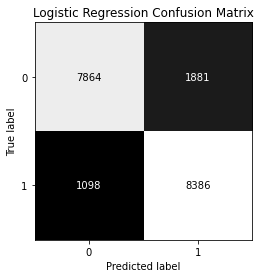

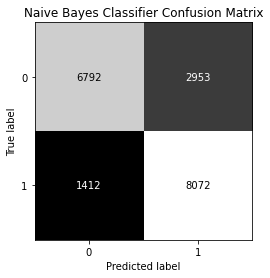

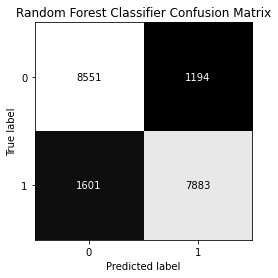

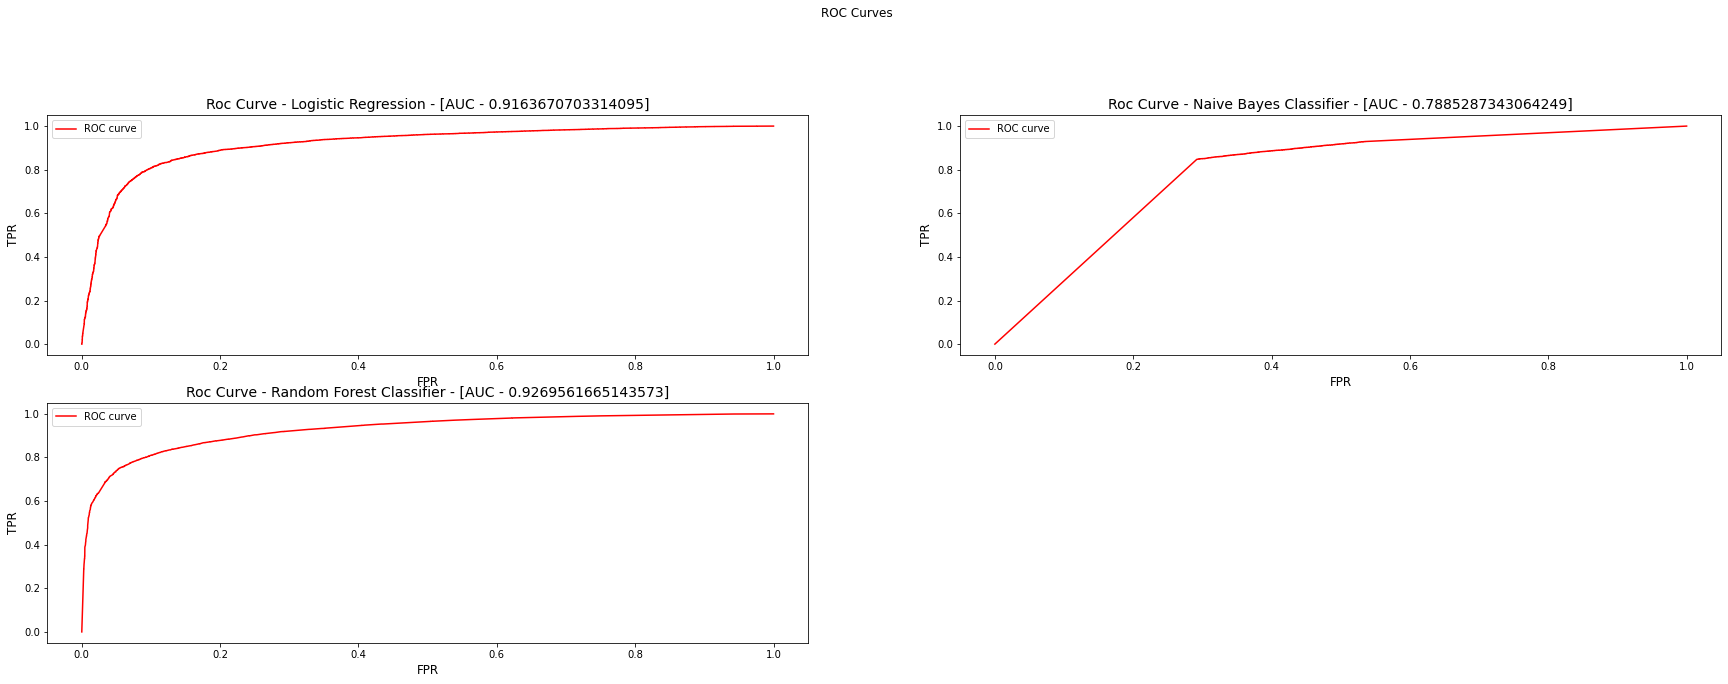

In [33]:
evaluation(result_bow, y_test, train_test_split=True)

### TF * IDF

              precision    recall  f1-score   support

           0       0.83      0.78      0.81      9651
           1       0.79      0.84      0.82      9578

    accuracy                           0.81     19229
   macro avg       0.81      0.81      0.81     19229
weighted avg       0.81      0.81      0.81     19229

              precision    recall  f1-score   support

           0       0.81      0.64      0.71      9651
           1       0.70      0.85      0.77      9578

    accuracy                           0.74     19229
   macro avg       0.76      0.74      0.74     19229
weighted avg       0.76      0.74      0.74     19229

              precision    recall  f1-score   support

           0       0.87      0.90      0.88      9651
           1       0.89      0.86      0.88      9578

    accuracy                           0.88     19229
   macro avg       0.88      0.88      0.88     19229
weighted avg       0.88      0.88      0.88     19229



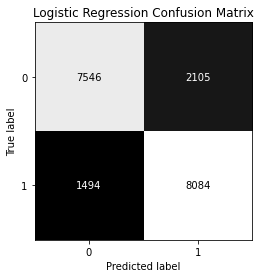

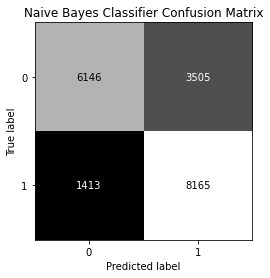

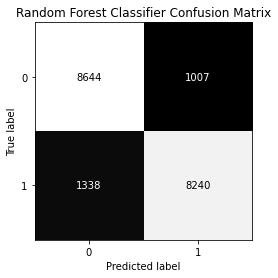

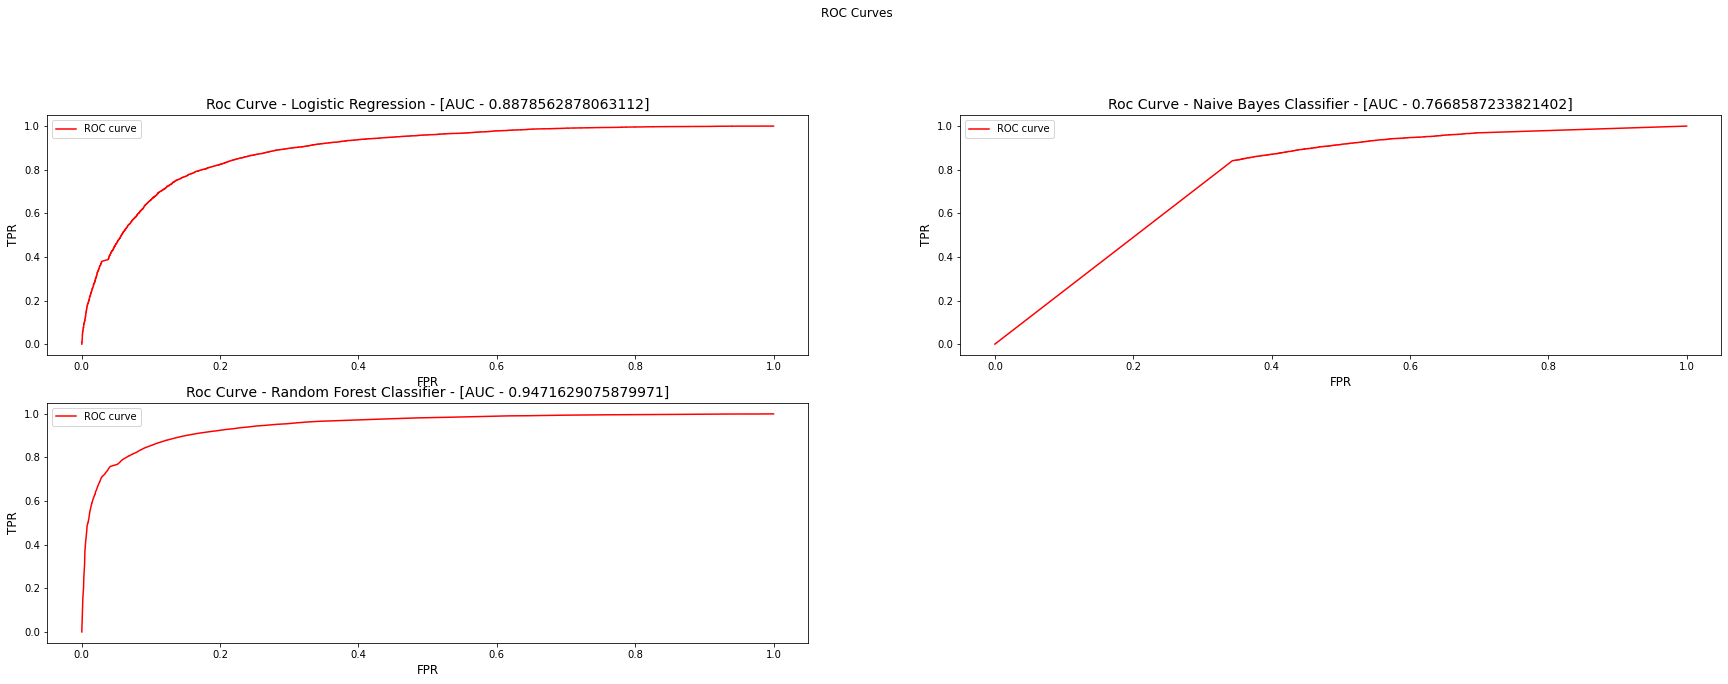

In [34]:
evaluation(result_tfidf, y_test, train_test_split=True)

### Word 2 Vec

              precision    recall  f1-score   support

           0       0.58      0.58      0.58      9681
           1       0.57      0.57      0.57      9548

    accuracy                           0.58     19229
   macro avg       0.58      0.58      0.58     19229
weighted avg       0.58      0.58      0.58     19229

              precision    recall  f1-score   support

           0       0.56      0.37      0.44      9681
           1       0.52      0.71      0.60      9548

    accuracy                           0.54     19229
   macro avg       0.54      0.54      0.52     19229
weighted avg       0.54      0.54      0.52     19229

              precision    recall  f1-score   support

           0       0.87      0.85      0.86      9681
           1       0.85      0.87      0.86      9548

    accuracy                           0.86     19229
   macro avg       0.86      0.86      0.86     19229
weighted avg       0.86      0.86      0.86     19229



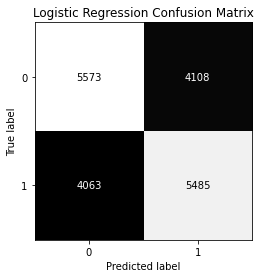

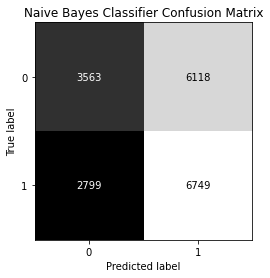

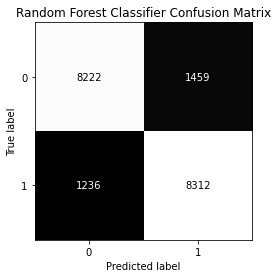

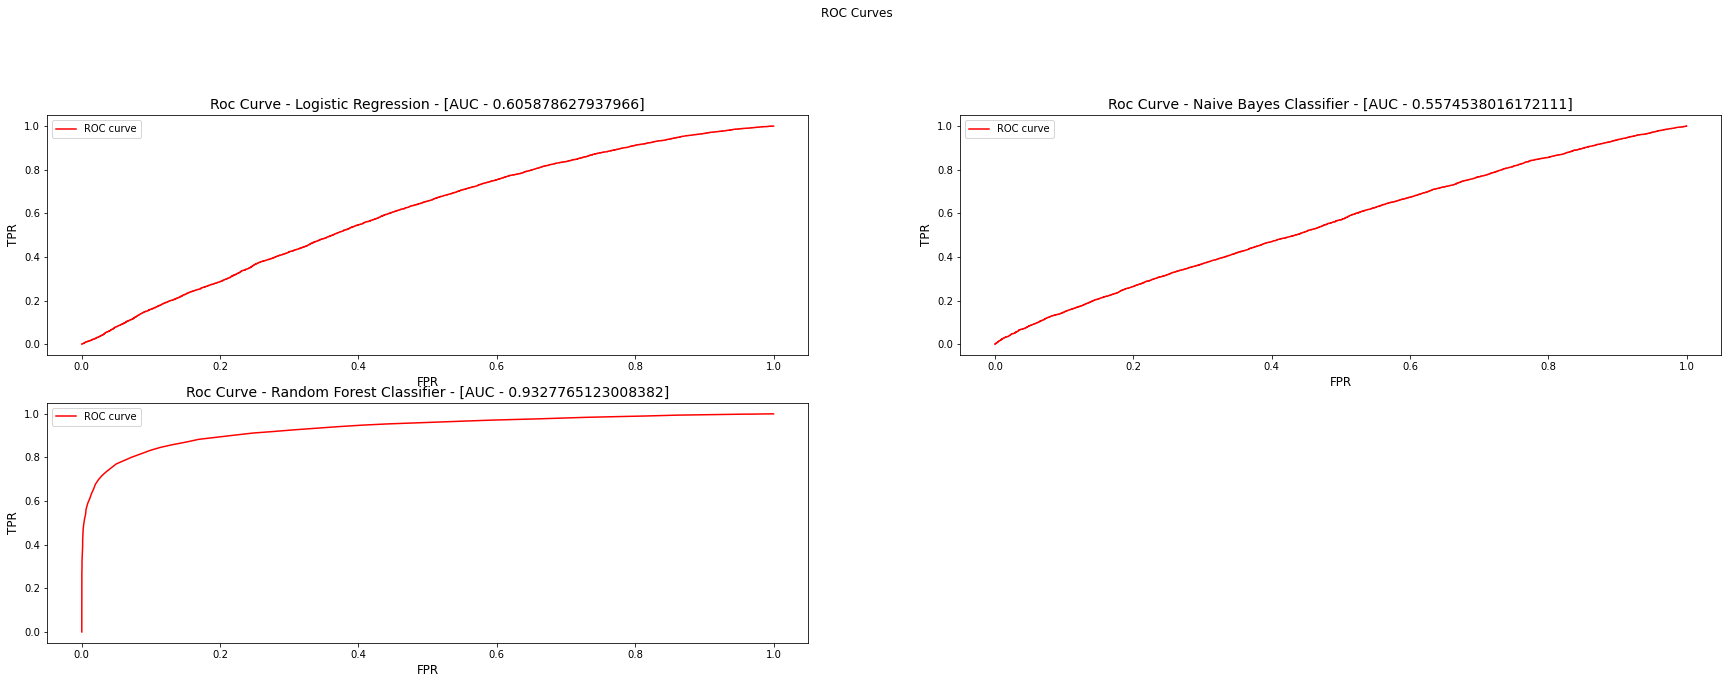

In [35]:
evaluation(result_w2v, y_test, train_test_split=True)